<a href="https://colab.research.google.com/github/pankovakris/coursera/blob/main/Stepik_CV_week4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import torch
import random
import numpy as np

random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [62]:
import torchvision.datasets
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)

In [63]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:52: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:67: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:57: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [64]:
X_train.dtype, y_train.dtype

(torch.uint8, torch.int64)

In [65]:
X_train = X_train.float()
X_test = X_test.float()

In [66]:
X_train.shape, X_test.shape

(torch.Size([60000, 28, 28]), torch.Size([10000, 28, 28]))

In [67]:
y_train.shape, y_test.shape

(torch.Size([60000]), torch.Size([10000]))

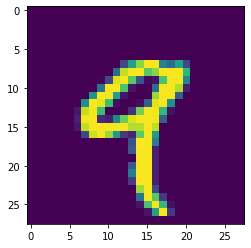

tensor(9)


In [68]:
import matplotlib.pyplot as plt
plt.imshow(X_train[4, :, :])
plt.show()
print(y_train[4])

In [69]:
X_train = X_train.reshape([-1, 28 * 28])
X_test = X_test.reshape([-1, 28 * 28]) #решейпим все в один вектор 28 * 28 чтобы можно было скормить линейным слоям

In [70]:
class MNISTNet(torch.nn.Module):
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28 * 28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10) 
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x
    
mnist_net = MNISTNet(100)

In [71]:
torch.cuda.is_available()

True

In [72]:
!nvidia-smi

Wed Feb 23 16:39:12 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   73C    P0    70W / 149W |   1058MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [73]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
mnist_net = mnist_net.to(device)
print(device)

cuda:0


In [74]:
loss = torch.nn.CrossEntropyLoss() #кросс энтропия как лосс
#если софтмакс и энтропию соединить в 1 функцию, то вычисления будут чуть быстрее - thats why  в форварде софтмакса нет
optimizer = torch.optim.Adam(mnist_net.parameters(), lr=1.0e-3) #адам aka the icon чтобы оптимизировать веса нейронки, передаем ему все параметры и learning rate по умолчанию

In [75]:
x=torch.zeros([6000, 28, 28], dtype=torch.int32)
x.reshape(-1).shape

torch.Size([4704000])

In [76]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        
        batch_indexes = order[start_index:start_index+batch_size]
        
        X_batch = X_train[batch_indexes].to(device)
        y_batch = y_train[batch_indexes].to(device)
        
        preds = mnist_net.forward(X_batch) 
        
        loss_value = loss(preds, y_batch)
        loss_value.backward()
        
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, y_test).cpu().detach().numpy())
    
    accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().cpu().detach().numpy()
    test_accuracy_history.append(accuracy)
    print(accuracy)

0.9088
0.9141
0.92039996
0.92399997
0.92609996
0.92319995
0.93009996
0.931
0.9295
0.93149996
0.92829996
0.9284
0.9341
0.932
0.9342
0.9392
0.93899995
0.93829995
0.9377
0.9353
0.9411
0.93899995
0.9377
0.9345
0.9375
0.9414
0.9417
0.9417
0.94269997
0.94549996
0.94159997
0.94589996
0.94369996
0.9453
0.9424
0.9438
0.9428
0.946
0.9446
0.9479
0.94869995
0.9481
0.9464
0.94299996
0.94659996
0.9514
0.94939995
0.9522
0.9485
0.94949996
0.9507
0.9529
0.9475
0.95049995
0.9544
0.9543
0.95419997
0.95089996
0.9532
0.9528
0.95239997
0.9493
0.95479995
0.95549995
0.95369995
0.9571
0.9546
0.95809996
0.9543
0.9536
0.95419997
0.95269996
0.9521
0.95409995
0.95589995
0.95669997
0.95839995
0.95549995
0.95409995
0.954
0.9575
0.95839995
0.9553
0.9575
0.9576
0.95769995
0.9578
0.9596
0.95559996
0.9575
0.9557
0.9543
0.9572
0.955
0.9586
0.95809996
0.95629996
0.9587
0.9596
0.95739996


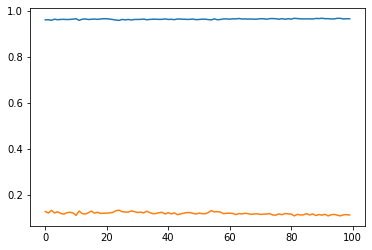

In [60]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);
#АХЗВХЗППХЪПЗЪЪ а зачем обучать мы ж и так умные 

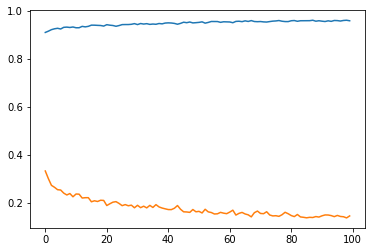

In [77]:
plt.plot(test_accuracy_history)
plt.plot(test_loss_history);
#теперь честно